In [80]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)

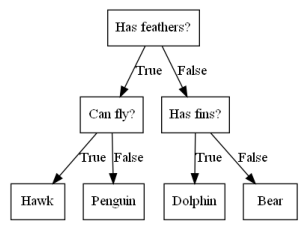

In [5]:
mglearn.plots.plot_animal_tree()

In [6]:
# page 106 ~

In [10]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42) # stratify 골고루 섞이게끔
tree = DecisionTreeClassifier(random_state = 0) # 옵션 따로 없음.
tree.fit(X_train, y_train)
print(tree.score(X_train,y_train)) # 훈련 세트 정확도
print(tree.score(X_test,y_test))   # 테스트 세트 정확도 

1.0
0.9370629370629371


In [13]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0) # 여녹된 질문을 최대 4개로 제한(훈련의 정도를 정함.) 
tree.fit(X_train, y_train)
print(tree.score(X_train,y_train)) 
print(tree.score(X_test,y_test))

0.9882629107981221
0.951048951048951


In [15]:
from sklearn.tree import export_graphviz

In [24]:
export_graphviz(tree, out_file = 'tree.dot', class_names=["악성", "양성"],
               feature_names = cancer.feature_names, impurity = False, filled = True)
# 작업 위치에 tree.dot에 워드 파일이 나옴 / 문자로 풀어서 나옴 

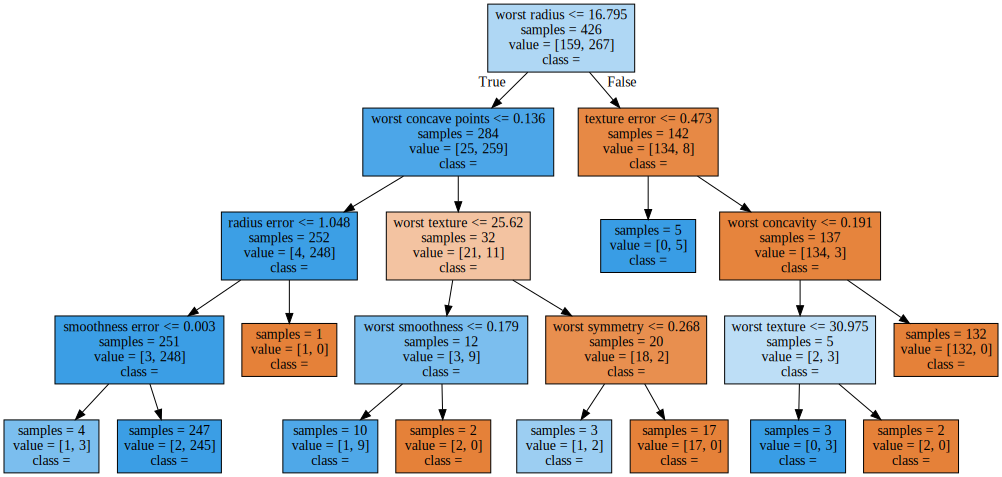

In [27]:
import graphviz
with open('tree.dot', encoding = "UTF-8") as f:
    g = f.read()
display(graphviz.Source(g))

In [30]:
cancer.data.shape

(569, 30)

In [32]:
# 특성 중요도
for n, f in zip(cancer.feature_names,tree.feature_importances_):
    print(n, f)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


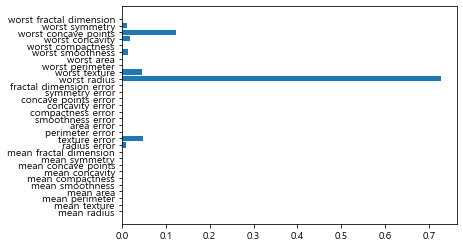

In [37]:
# 특성 중요도 시각화
import numpy as np
import matplotlib.pyplot as plt 
n_feature = cancer.data.shape[1]
plt.barh(np.arange(n_feature), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.show()

Feature importances: [0. 1.]


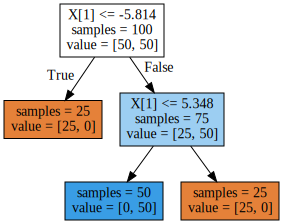

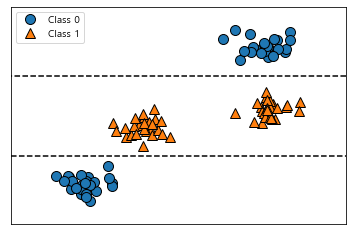

In [39]:
mglearn.plots.plot_tree_not_monotone()

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


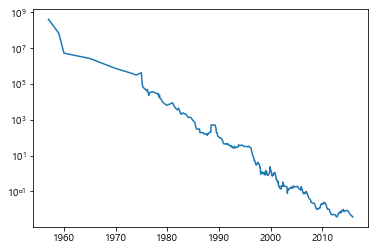

In [81]:
import pandas as pd
ram_prices = pd.read_csv('ram_price.csv')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.show()

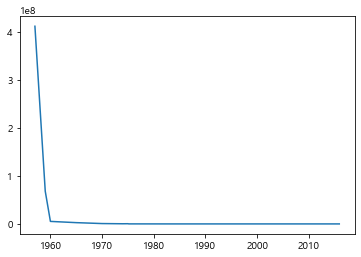

In [49]:
plt.plot(ram_prices.date, ram_prices.price) # 위 그래프는 로그가 적용되어 낙하 폭이 매우 차이남을 알 수 있다.
plt.show()

In [52]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련/ 이후를 테스트 데이터로
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [54]:
data_train.shape

(202, 3)

In [56]:
data_test.shape

(131, 3)

In [61]:
# 가격 예츨을 위해 날짜 특성만 이용
X_train = data_train.date.to_numpy()
X_train

array([1957.  , 1959.  , 1960.  , 1965.  , 1970.  , 1973.  , 1974.  ,
       1975.  , 1975.08, 1975.25, 1975.75, 1976.  , 1976.17, 1976.42,
       1976.58, 1977.08, 1978.17, 1978.25, 1978.33, 1978.5 , 1978.58,
       1978.75, 1979.  , 1979.75, 1980.  , 1981.  , 1981.58, 1982.  ,
       1982.17, 1982.67, 1983.  , 1983.67, 1984.  , 1984.58, 1985.  ,
       1985.33, 1985.42, 1985.5 , 1985.58, 1985.67, 1985.83, 1985.92,
       1986.  , 1986.08, 1986.17, 1986.25, 1986.33, 1986.42, 1986.5 ,
       1986.58, 1986.67, 1986.75, 1986.92, 1987.  , 1987.08, 1987.17,
       1987.25, 1987.33, 1987.42, 1987.5 , 1987.58, 1987.67, 1987.75,
       1987.83, 1987.92, 1988.  , 1988.08, 1988.17, 1988.33, 1988.42,
       1988.5 , 1988.58, 1988.67, 1988.75, 1988.83, 1988.92, 1989.  ,
       1989.08, 1989.17, 1989.25, 1989.42, 1989.5 , 1989.58, 1989.67,
       1989.75, 1989.83, 1989.92, 1990.  , 1990.17, 1990.33, 1990.42,
       1990.5 , 1990.58, 1990.67, 1990.75, 1990.83, 1990.92, 1991.  ,
       1991.08, 1991

In [63]:
# 2차원 배열로 바꿈
X_train = data_train.date.to_numpy()[:, np.newaxis]
X_train

array([[1957.  ],
       [1959.  ],
       [1960.  ],
       [1965.  ],
       [1970.  ],
       [1973.  ],
       [1974.  ],
       [1975.  ],
       [1975.08],
       [1975.25],
       [1975.75],
       [1976.  ],
       [1976.17],
       [1976.42],
       [1976.58],
       [1977.08],
       [1978.17],
       [1978.25],
       [1978.33],
       [1978.5 ],
       [1978.58],
       [1978.75],
       [1979.  ],
       [1979.75],
       [1980.  ],
       [1981.  ],
       [1981.58],
       [1982.  ],
       [1982.17],
       [1982.67],
       [1983.  ],
       [1983.67],
       [1984.  ],
       [1984.58],
       [1985.  ],
       [1985.33],
       [1985.42],
       [1985.5 ],
       [1985.58],
       [1985.67],
       [1985.83],
       [1985.92],
       [1986.  ],
       [1986.08],
       [1986.17],
       [1986.25],
       [1986.33],
       [1986.42],
       [1986.5 ],
       [1986.58],
       [1986.67],
       [1986.75],
       [1986.92],
       [1987.  ],
       [1987.08],
       [19

In [67]:
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿈
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [71]:
# 예측은 전체 기간에 대해서 수행
X_all = ram_prices.date.to_numpy()[:, np.newaxis]
X_all

array([[1957.  ],
       [1959.  ],
       [1960.  ],
       [1965.  ],
       [1970.  ],
       [1973.  ],
       [1974.  ],
       [1975.  ],
       [1975.08],
       [1975.25],
       [1975.75],
       [1976.  ],
       [1976.17],
       [1976.42],
       [1976.58],
       [1977.08],
       [1978.17],
       [1978.25],
       [1978.33],
       [1978.5 ],
       [1978.58],
       [1978.75],
       [1979.  ],
       [1979.75],
       [1980.  ],
       [1981.  ],
       [1981.58],
       [1982.  ],
       [1982.17],
       [1982.67],
       [1983.  ],
       [1983.67],
       [1984.  ],
       [1984.58],
       [1985.  ],
       [1985.33],
       [1985.42],
       [1985.5 ],
       [1985.58],
       [1985.67],
       [1985.83],
       [1985.92],
       [1986.  ],
       [1986.08],
       [1986.17],
       [1986.25],
       [1986.33],
       [1986.42],
       [1986.5 ],
       [1986.58],
       [1986.67],
       [1986.75],
       [1986.92],
       [1987.  ],
       [1987.08],
       [19

In [73]:
pred_tree = tree.predict(X_all)
pred_lr   = linear_reg.predict(X_all)

In [75]:
# 예측한 값의 로그 스케일로 되돌림
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


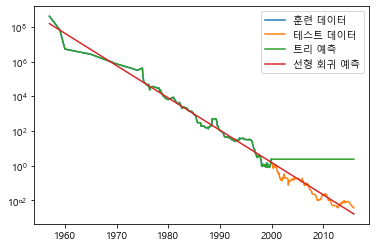

In [83]:
plt.semilogy(data_train.date, data_train.price, label = '훈련 데이터')
plt.semilogy(data_test.date, data_test.price, label = '테스트 데이터')
plt.semilogy(ram_prices.date, price_tree, label = '트리 예측')
plt.semilogy(ram_prices.date, price_lr, label = '선형 회귀 예측')
plt.legend()
plt.show()

In [84]:
# 랜덤포레스트

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

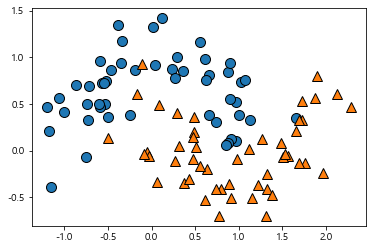

In [92]:
# random_state 값을 바꿔 여러가지를 바꿔줌
# noise 값을 바꿔 적절히 섞어줌
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

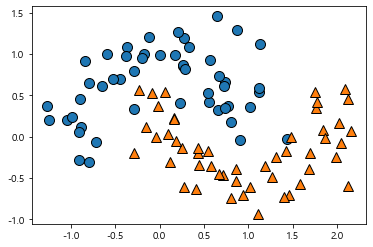

In [94]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=0)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

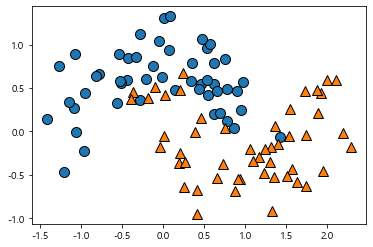

In [95]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=40)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

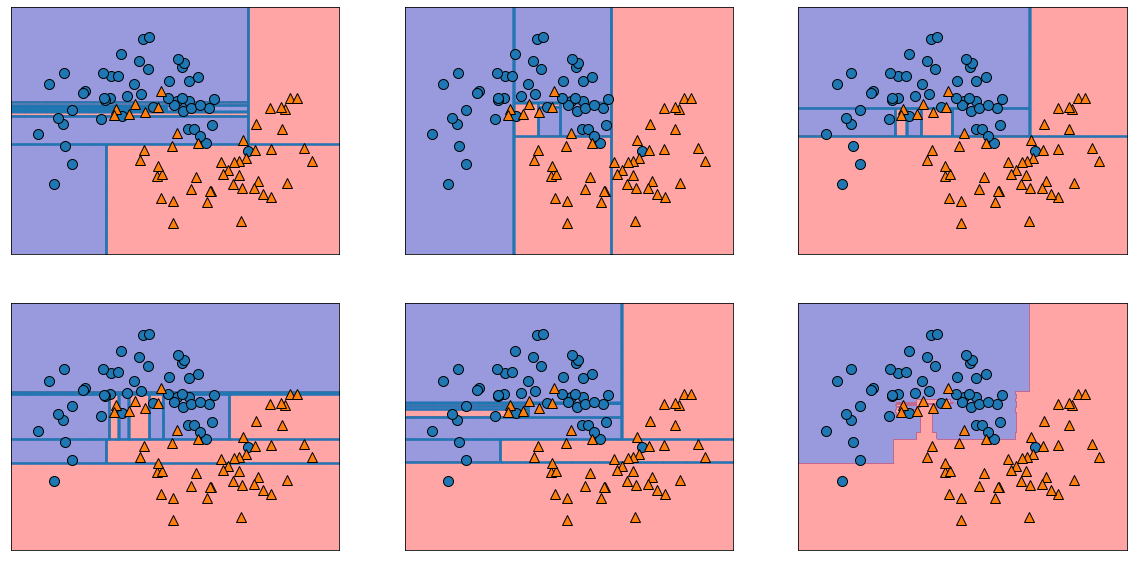

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, random_state=42)
forest = RandomForestClassifier(n_estimators = 5, random_state = 2).fit(
                                                X_train, y_train)
 
    
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill = True, alpha = 0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [102]:
# 그레이디언트 부스팅 눈 코딩
# from sklearn.ensemble import GradientBoostingClassifier

In [105]:
# 서포트 백터 클래씨파이어

In [107]:
from sklearn.svm import SVC

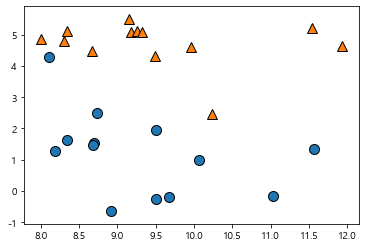

In [110]:
X, y = mglearn.tools.make_handcrafted_dataset()
mglearn.discrete_scatter(X[:,0], X[:,1], y)

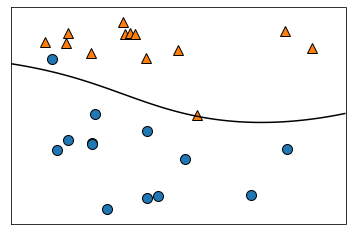

In [113]:
svm = SVC(kernel='rbf', C = 10, gamma = 0.1).fit(X, y) # c값이 크면 규제가 빡세짐 / gamma가 커지면 곡선으로 래핑을 함.
mglearn.plots.plot_2d_separator(svm, X, eps = 0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

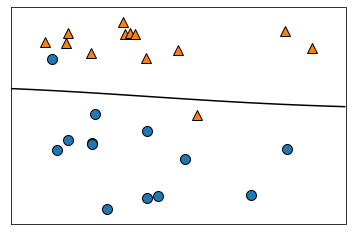

In [115]:
# C 값 비교
svm = SVC(kernel='rbf', C = 1, gamma = 0.1).fit(X, y) # c값이 크면 규제가 빡세짐 / gamma가 커지면 곡선으로 래핑을 함.
mglearn.plots.plot_2d_separator(svm, X, eps = 0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

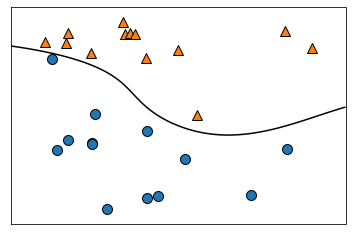

In [117]:
# 최적화 된 감마값, c 값 찾기
svm = SVC(kernel='rbf', C = 10, gamma = 0.4).fit(X, y) # c값이 크면 규제가 빡세짐 / gamma가 커지면 곡선으로 래핑을 함.
mglearn.plots.plot_2d_separator(svm, X, eps = 0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

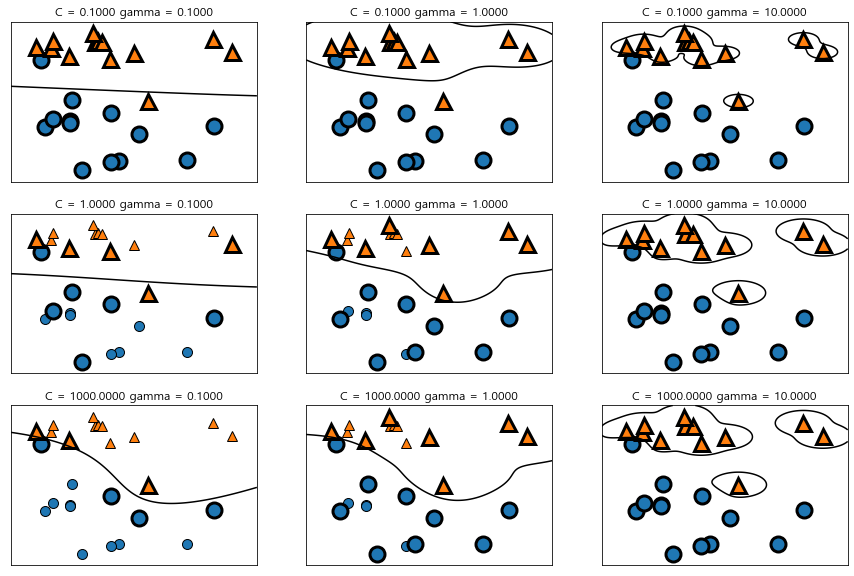

In [121]:
fig, axes = plt.subplots(3, 3, figsize = (15, 10)) # 서브 플롯 갯수와 크기 만들기
for ax_c, C in zip(axes, [-1, 0 ,3]):               # 가로축 설정 /  C : 10^-1 = 0.1 / 10^0 = 1 / 10^3 =1000 지수로 설정함.
    for ax_g, gamma in zip(ax_c, [-1, 0, 1]):        # gamma 값 10^-1 = 0.1 / 10^0 = 1 / 10^1 = 10 
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax = ax_g)

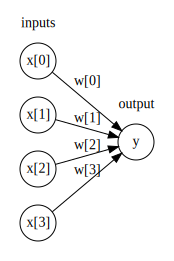

In [124]:
# 딥러닝의 기본이 되는 선형 회귀 그래프 // input은 하나하나 모두 feature가 된다.
mglearn.plots.plot_logistic_regression_graph()

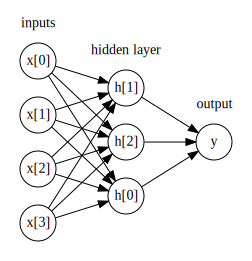

In [125]:
mglearn.plots.plot_single_hidden_layer_graph()